In [ ]:
!pip install tensorflow

In [3]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader=csv.reader(training_file,delimiter=',')
        f=True
        temp_images=[]
        temp_labels=[]
        for row in csv_reader:
            if f:
                f=False
            else:
                temp_labels.append(row[0])
                img_data=row[1:785]
                img_data_array=np.array_split(img_data,28)
                temp_images.append(img_data_array)
        images=np.array(temp_images).astype('float')
        labels=np.array(temp_labels).astype('float')
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


NameError: name 'getcwd' is not defined

In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=-1)
testing_images = np.expand_dims(testing_images,axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
   
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(26,activation='softmax')])

# Compile Model. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images,training_labels,batch_size=32),
                              steps_per_epoch=len(training_images)/32,
                              epochs=2,
                              validation_data=validation_datagen.flow(testing_images,testing_labels,batch_size=32),
                              validation_steps=len(testing_images)/32)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
858/857 [==============================] - 70s 82ms/step - loss: 2.8882 - accuracy: 0.1288 - val_loss: 2.1038 - val_accuracy: 0.3048
Epoch 2/2
858/857 [==============================] - 73s 85ms/step - loss: 2.2179 - accuracy: 0.3029 - val_loss: 1.6808 - val_accuracy: 0.4596


[205.70478928880325, 0.34202453]

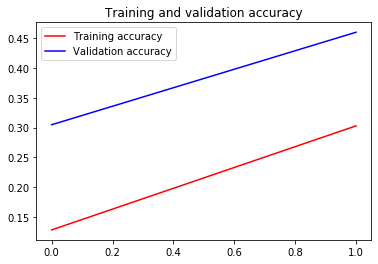

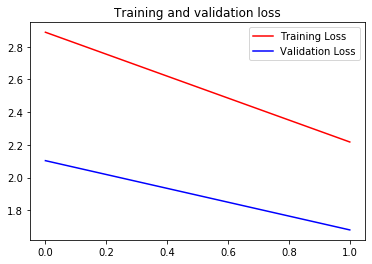

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);